# Predicting the crime rate with decision tree


## Objective
Create a predictive model for the crime rate using a simple decision tree.

## [Dataset](https://docs.google.com/spreadsheets/d/1rruRHMCALDpWSSzKIHTl9Yello4y-xsWaIL1V8b9dwU/edit#gid=0)
* It contains data of 99 standard metropolitan areas in the US.
* Provides information on 10 variables for each area for the period 1976-1977.
* The areas have been divided into four geographic regions:
    - 1: North-East
    - 2: North-Central
    - 3: South
    - 4: West

The variables provided are listed in the following table,

| variable name    | description |
|------------------|-------------------------------------------------------|
| `land_area`        | size in square miles                                  |
| `total_population` | estimated population in thousands                     |
| `percent_city`     | percent of population in central city/cities          |
| `percent_senior`   | percent population <= 65 years                        |
| `physicians`       | number of professionally active physicians            |
| `hospital beds`    | total number of hospital beds                         |
| `graduates`        | percent of adults that finished high school           |
| `work_force`       | number of persons in work force in thousands          |
| `income`           | total income in 1976 in millions of dollars           |
| `crime_rate`       | ratio of number of serious crimes by total population |
| `region`           | geographic region according to US census              |


##### References
1. [Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning). Kaggle.
2. An Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly), 2017.

## Data loading

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset as a dataframe
metrop_areas = pd.read_csv('metropolitan_areas_dataset.csv')

In [3]:
# visualize the first 3 lines of the dataset
metrop_areas.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32


In [4]:
# view the size of the dataset
metrop_areas.shape

(99, 10)

The dataset has **99 rows $\times$ 10 columns**.

In [5]:
# print a summary of the dataframe
metrop_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


As we can see from above, the dataset is formed by numerical data (5 floats, 5 integers) and do not have null values, what we can also check below,

In [6]:
# total number of null values, if they are present
metrop_areas.isnull().sum()[metrop_areas.isnull().sum() > 0]

Series([], dtype: int64)

There are not any missing values.

In [7]:
# descriptive statistics about dataset
metrop_areas.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


### Creating a modified dataframe using one-hot encoding for `region`

We'll create a **modified dataset** using one-hot encoding to separate the geographical regions in the feature `region`. This will be used to build another machine learning model for comparison.

In [8]:
# use one-hot enconding for region to create a new dataset from the original
metrop_areas_dummy = pd.get_dummies(data=metrop_areas, columns=['region'], prefix='region', prefix_sep='_')
metrop_areas_dummy.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,crime_rate,region_1,region_2,region_3,region_4
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,75.55,1,0,0,0
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,56.03,0,1,0,0
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,41.32,1,0,0,0


## Exploring the data

Let's list the columns names:

In [9]:
list(metrop_areas.columns)

['land_area',
 'percent_city',
 'percent_senior',
 'physicians',
 'hospital_beds',
 'graduates',
 'work_force',
 'income',
 'region',
 'crime_rate']

We can plot a pairplot to explore the existing relationships in the dataset. The data is mapped in a grid below, and since we have 10 variables in the dataset we'll have a 10 $\times$ 10 plot.

### Pairplot: relationships between dataset variables

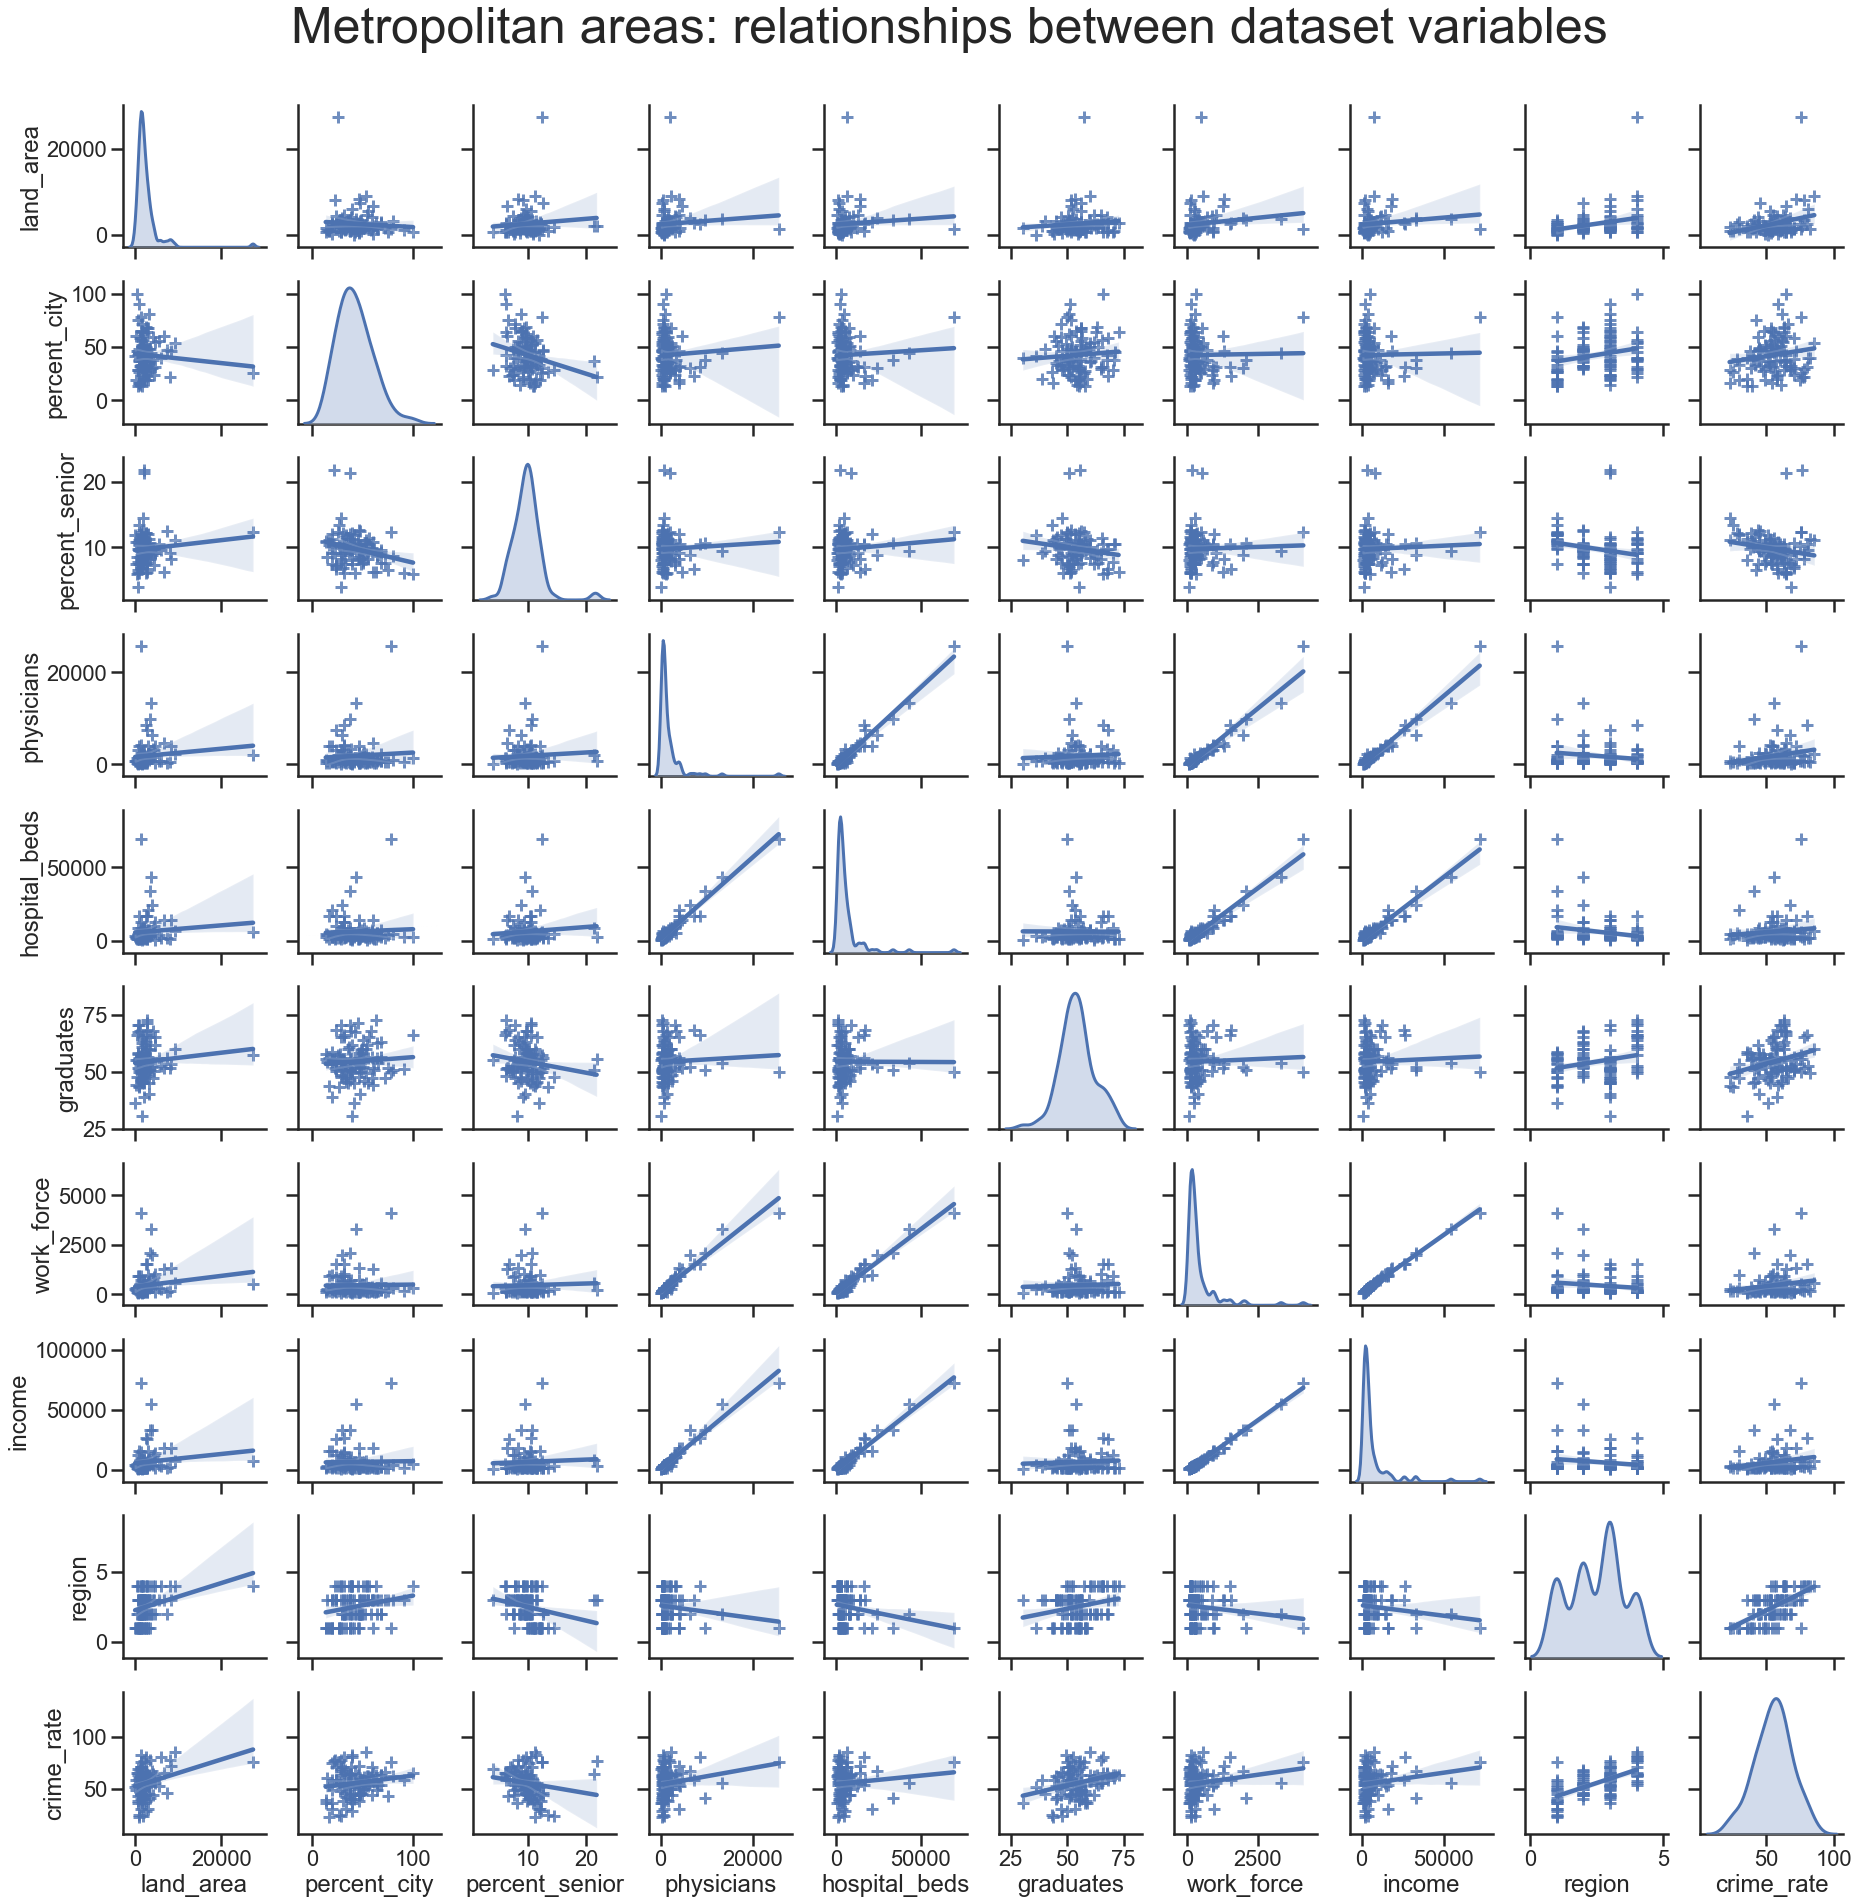

In [10]:
# create a pairplot using seaborn to visualize relationships in the dataset

sns.set(style='ticks')
sns.set_context('poster')

sns.pairplot(metrop_areas, diag_kind='kde', kind='reg', markers='+')
sns.color_palette("bright")
plt.suptitle("Metropolitan areas: relationships between dataset variables", y=1.05, size=50)
plt.show()

In the diagonals of the pairplot we can see histograms for each numerical variable showing the distribution plotted against each other, and off-diagonal we can see scatter plots with a linear regression fit.

Since the histogram for the feature `region` presents a different pattern,  we can plot a bar chart for the different geographical regions. Even though the regions are represented by numbers in the dataset they are categorical(nominal) variables.

### Bar plot: distribution of geographical areas

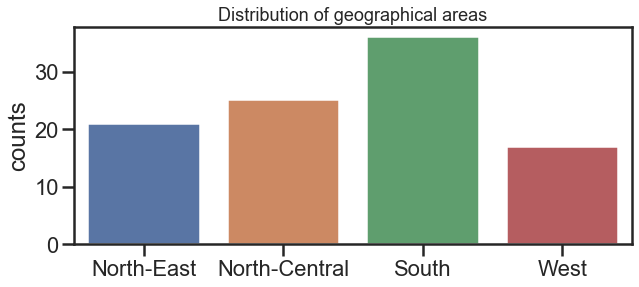

In [11]:
# bar plot for geographical areas
geo_region = ['North-East', 'North-Central', 'South', 'West']
counts_region =metrop_areas['region'].value_counts(normalize=False).sort_index()

fig, ax = plt.subplots(figsize = (10,4))
sns.set(style='whitegrid')
sns.set_context('talk')
sns.barplot(x = geo_region, y = counts_region)
ax.set(ylabel = 'counts', title = 'Distribution of geographical areas')
plt.show()

We also can generate the correlation matrix and visualized it in a heatmap plot.

### Heatmap: correlaton matrix

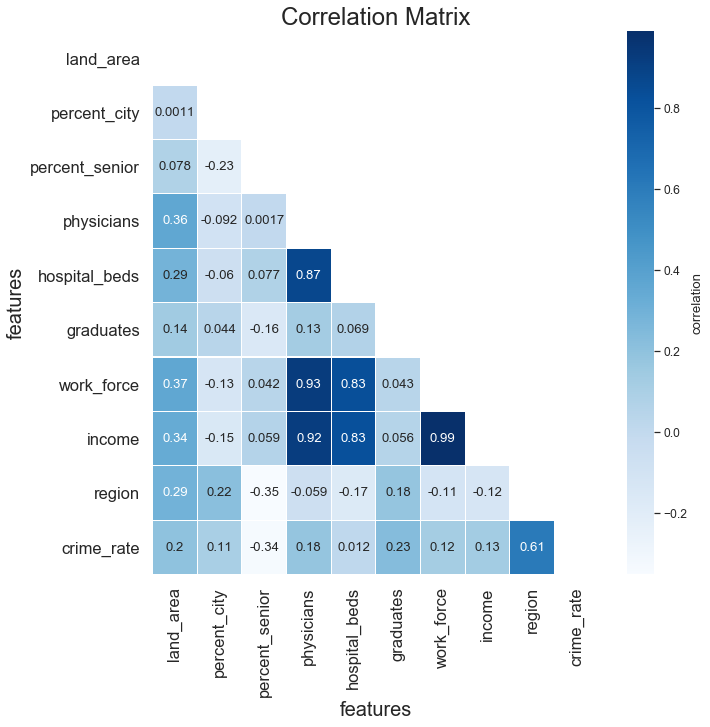

In [12]:
# Correlation matrix completely ignores any non-numeric column. 
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(metrop_areas.corr('spearman'))
sns.set(font_scale=1.1)
sns.heatmap(metrop_areas.corr(method='spearman'), linewidth= 0.1, annot=True, cmap='Blues', cbar_kws={'label': 'correlation'}, mask=matrix)
plt.xlabel("features", size=20)
plt.ylabel("features", size=20)
plt.title("Correlation Matrix", size=24)
plt.show()

The crime rate is positively correlated mainly to region(0.61).

## Building machine learning models using regression trees

### Separating features from the target variable: X and y

Since we want to predict the crime rate we will separate our data set into features(`X`) and target variable(`y`).

In [13]:
# separe features(X) from target variable(y)
X = metrop_areas.drop('crime_rate', axis=1)  # attibutes to X all the variables except crime_rate
y = metrop_areas['crime_rate']

In [14]:
# visualize 3 lines of X
X.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1


In [15]:
# visualize 3 lines of y
y.head(3)

0    75.55
1    56.03
2    41.32
Name: crime_rate, dtype: float64

### Separating features from the target variable: X and y (modified dataset)

In [16]:
# separe features(X) from target variable(y)
X_dummy = metrop_areas_dummy.drop('crime_rate', axis=1)  # attibutes to X all the variables except crime_rate
y_dummy = metrop_areas_dummy['crime_rate']

In [17]:
# visualize 3 lines of X
X_dummy.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region_1,region_2,region_3,region_4
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,0,0,0
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,0,1,0,0
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,0,0,0


In [18]:
# visualize 3 lines of y
y_dummy.head(3)

0    75.55
1    56.03
2    41.32
Name: crime_rate, dtype: float64

### Splitting the dataset into training and test sets

This is done in order to evaluate the model later. First, we'll train our model using the training set and later we'll validate our model using the test set. This can be easily accomplished using the function `train_test_split` from `sklearn` module.

In [19]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 22)

In [20]:
# examine the firts 3 lines of training set
X_train.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
77,1526,71.7,7.7,413,1636,47.1,125.8,1692,3
35,903,37.3,9.6,948,4064,55.6,293.3,4102,2
85,1697,23.8,7.2,338,1610,51.0,105.9,1354,3


In [21]:
# examine the firts 3 lines of target variable in the training set
y_train.head(3)

77    66.13
35    52.53
85    70.50
Name: crime_rate, dtype: float64

In [22]:
# examine the firts 3 lines of test set
X_test.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1
49,1165,14.5,8.6,746,4277,54.4,237.1,3724,3
81,2710,63.7,6.2,357,1277,72.8,110.9,1639,4


In [23]:
# examine the firts 3 lines of target variable in the test set
y_test.head(2)

2     41.32
49    60.77
Name: crime_rate, dtype: float64

### Splitting the modified dataset into training and test sets

In [24]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, test_size = 0.30, random_state = 22)

In [25]:
# examine the firts 3 lines of training set
X_train_dummy.head(2)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region_1,region_2,region_3,region_4
77,1526,71.7,7.7,413,1636,47.1,125.8,1692,0,0,1,0
35,903,37.3,9.6,948,4064,55.6,293.3,4102,0,1,0,0


In [26]:
# examine the firts 3 lines of target variable in the training set
y_train_dummy.head(3)

77    66.13
35    52.53
85    70.50
Name: crime_rate, dtype: float64

In [27]:
# examine the firts 3 lines of test set
X_test_dummy.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region_1,region_2,region_3,region_4
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,0,0,0
49,1165,14.5,8.6,746,4277,54.4,237.1,3724,0,0,1,0
81,2710,63.7,6.2,357,1277,72.8,110.9,1639,0,0,0,1


In [28]:
# examine the firts 3 lines of target variable in the test set
y_test_dummy.head(3)

2     41.32
49    60.77
81    63.10
Name: crime_rate, dtype: float64

### Model 1: original data set, default parameters
* original dataset
* `DecisionTreeRegressor` with default parameters 

In [29]:
# build the decision tree using default settings
from sklearn.tree import DecisionTreeRegressor

crime_rate_model_1 = DecisionTreeRegressor()
crime_rate_model_1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Model evaluation

We can predict the crime rates for the first five data points using `predict()`.

In [30]:
# show options for metrics
import sklearn
sklearn.metrics.SCORERS.keys()  # show options

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [31]:
# predicting crime rate for some individual datapoints
print('*'*20,'MODEL 1','*'*20)
print('Predicting the crime rate for the following 5 data points:\n')
print(X_test.head(5))
print('\nThe predicted crime rates are:')
print(crime_rate_model_1.predict(X_test.head(5)))

******************** MODEL 1 ********************
Predicting the crime rate for the following 5 data points:

    land_area  percent_city  percent_senior  physicians  hospital_beds  \
2        3553          37.4            10.7        9724          33731   
49       1165          14.5             8.6         746           4277   
81       2710          63.7             6.2         357           1277   
31       3491          48.5             9.7        1496           5620   
37        938          48.1             7.4         614           3016   

    graduates  work_force  income  region  
2        50.6      2066.3   33216       1  
49       54.4       237.1    3724       3  
81       72.8       110.9    1639       4  
31       59.6       362.3    4798       3  
37       50.0       280.9    4177       2  

The predicted crime rates are:
[45.19 70.5  63.44 63.04 68.48]


We can also calculate some metrics to help us to estimate the quality of the model:
* MSE: mean squared error
* MAE: mean absolute error
* Rsquared: ${r^2}$

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = crime_rate_model_1.predict(X_test)
y_pred_sel = crime_rate_model_1.predict(X_test.iloc[[21]])
y_test_sel = y_test.iloc[[21]]

print('*'*20,'MODEL 1','*'*20)
print("MSE for DTReg (All features): " , np.round(mean_squared_error(y_test, y_pred), 2))
print("MSE for DTReg (Features Selected): " , np.round(mean_squared_error(y_test_sel, y_pred_sel), 2))
print("MAE for DTReg (All features): " , np.round(mean_absolute_error(y_test, y_pred), 2))
print("MAE for DTReg (Features Selected): " , np.round(mean_absolute_error(y_test_sel, y_pred_sel), 2))
print("RSquared for DTReg (All features): " , np.round(r2_score(y_test, y_pred), 2))
#print("RSquared for DTReg (Features Selected): " , np.round(r2_score(y_test_sel, y_pred_sel), 2))

******************** MODEL 1 ********************
MSE for DTReg (All features):  312.5
MSE for DTReg (Features Selected):  787.36
MAE for DTReg (All features):  13.86
MAE for DTReg (Features Selected):  28.06
RSquared for DTReg (All features):  -0.64


#### Analysing decision trees

We can create a tree image using the function `export_graphiz` from the module `tree`. The graph is stored as *.dot* file.

In [33]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(crime_rate_model_1, out_file='crime_rate_model_1.dot', 
                          feature_names=X_test.columns,  
#                          class_names=['0', '1'],  
                          class_names=['No', 'Yes'],
                          filled=True, rounded=True,  
                          special_characters=True) 

Now we can visualize the graph in the *.dot* file using `graphviz` module.

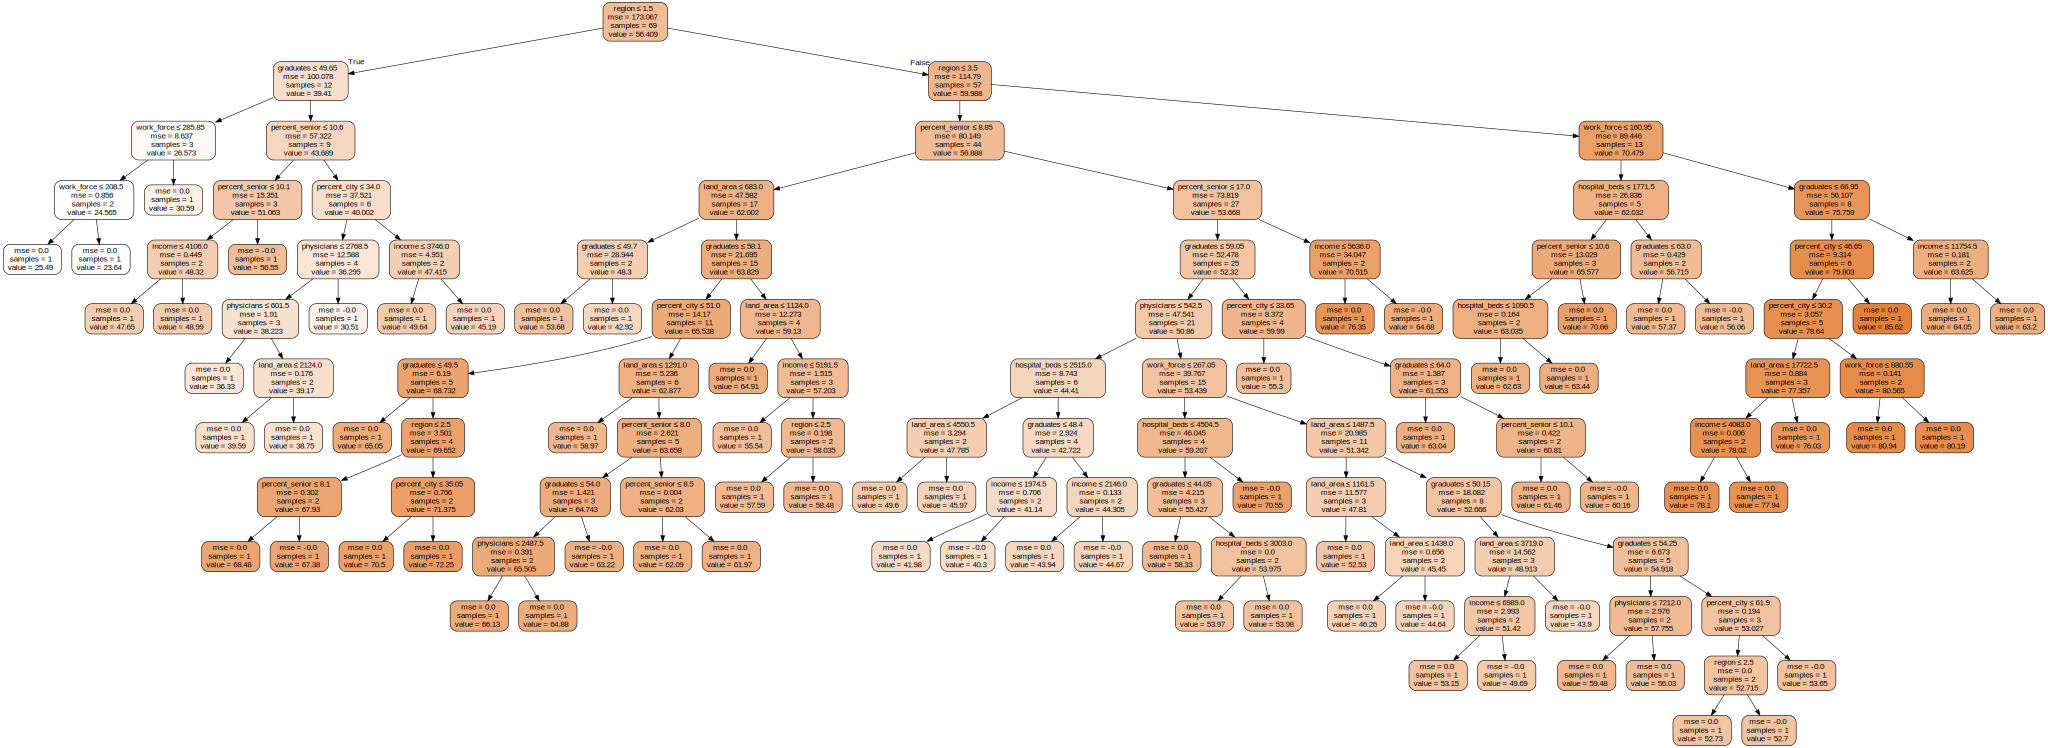

In [34]:
# visualize the graph for the tree
with open("crime_rate_model_1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

As we can see the above tree image is huge. A workaround here is to save the image and then show it using `pyplot`.

C:\Users\vechi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


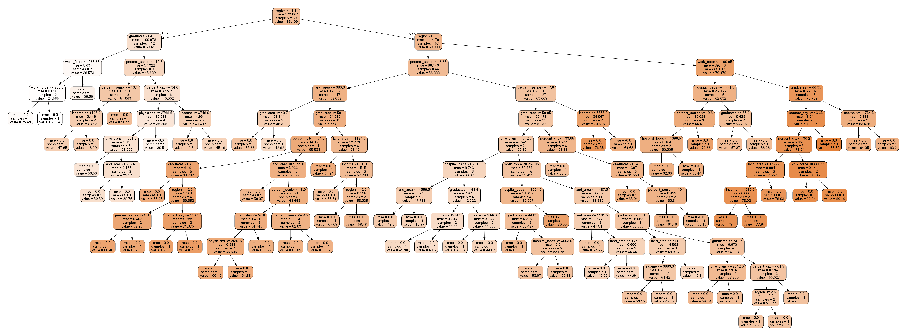

In [35]:
import pydotplus
import matplotlib.image as mpimg # supports basic image loading, rescaling and display operations.
import io                        # to deal with various types of I/O (input/output)

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(crime_rate_model_1, out_file=dot_data, rounded=True, 
                feature_names=X_test.columns, class_names=['No', 'Yes'],
                filled=True)

filename = "crime_rate_model_1.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(16,16))
plt.axes(frameon=False)     # hide axes lines
plt.xticks([])              # hide axis labels
plt.yticks([])              # hide axis labels
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

As we can see from the picture above, the model has too many leaves that make it complex to interpret.

We can reduce the overfitting, and the number of leaves, changing the parameter `max_depth` for the `DecisionTree.Regressor`.

### Model 2: original dataset, max_depth=3
* orginal dataset
* `max_depth = 3`

Here we are trying to make a simpler model, setting `max_depth` to `3`.

In [36]:
# build the decision tree using default settings
from sklearn.tree import DecisionTreeRegressor

crime_rate_model_2 = DecisionTreeRegressor(max_depth=3)
crime_rate_model_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Model evaluation

In [37]:
# predicting crime rate for some individual datapoints
print('*'*20,'MODEL 2','*'*20)
print('Predicting the crime rate for the following 5 data points:\n')
print(X_test.head(5))
print('\nThe predicted crime rates are:')
print(crime_rate_model_2.predict(X_test.head(5)))

******************** MODEL 2 ********************
Predicting the crime rate for the following 5 data points:

    land_area  percent_city  percent_senior  physicians  hospital_beds  \
2        3553          37.4            10.7        9724          33731   
49       1165          14.5             8.6         746           4277   
81       2710          63.7             6.2         357           1277   
31       3491          48.5             9.7        1496           5620   
37        938          48.1             7.4         614           3016   

    graduates  work_force  income  region  
2        50.6      2066.3   33216       1  
49       54.4       237.1    3724       3  
81       72.8       110.9    1639       4  
31       59.6       362.3    4798       3  
37       50.0       280.9    4177       2  

The predicted crime rates are:
[40.00166667 62.00235294 62.032      53.66814815 62.00235294]


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = crime_rate_model_2.predict(X_test)
y_pred_sel = crime_rate_model_2.predict(X_test.iloc[[21]])
y_test_sel = y_test.iloc[[21]]
print('*'*20,'MODEL 2','*'*20)
print("MSE for DTReg (All features): " , np.round(mean_squared_error(y_test, y_pred), 2))
print("MSE for DTReg (Features Selected): " , np.round(mean_squared_error(y_test_sel, y_pred_sel), 2))
print("MAE for DTReg (All features): " , np.round(mean_absolute_error(y_test, y_pred), 2))
print("MAE for DTReg (Features Selected): " , np.round(mean_absolute_error(y_test_sel, y_pred_sel), 2))
print("RSquared for DTReg (All features): " , np.round(r2_score(y_test, y_pred), 2))
#print("RSquared for DTReg (Features Selected): " , np.round(r2_score(y_test_sel, y_pred_sel), 2))

******************** MODEL 2 ********************
MSE for DTReg (All features):  213.46
MSE for DTReg (Features Selected):  445.63
MAE for DTReg (All features):  11.02
MAE for DTReg (Features Selected):  21.11
RSquared for DTReg (All features):  -0.12


#### Analysing decision trees

In [39]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(crime_rate_model_2, out_file='crime_rate_model_2.dot', 
                          feature_names=X_test.columns,  
#                          class_names=['0', '1'],  
                          class_names=['No', 'Yes'],
                          filled=True, rounded=True,  
                          special_characters=True) 

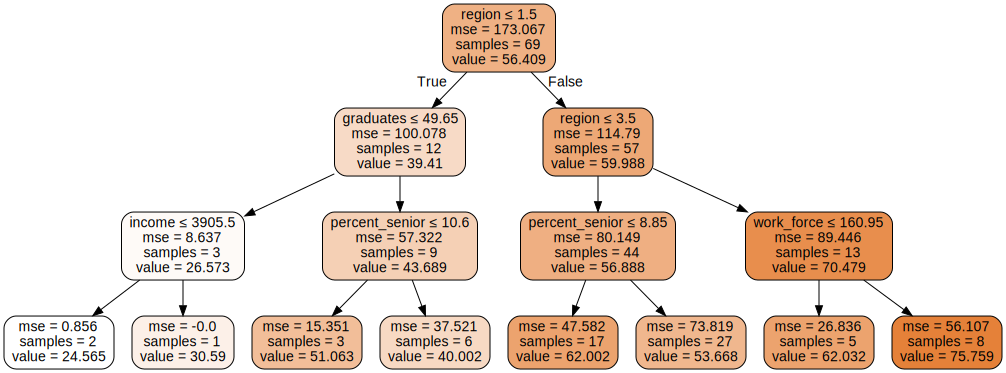

In [40]:
# visualize the graph for the tree
with open("crime_rate_model_2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

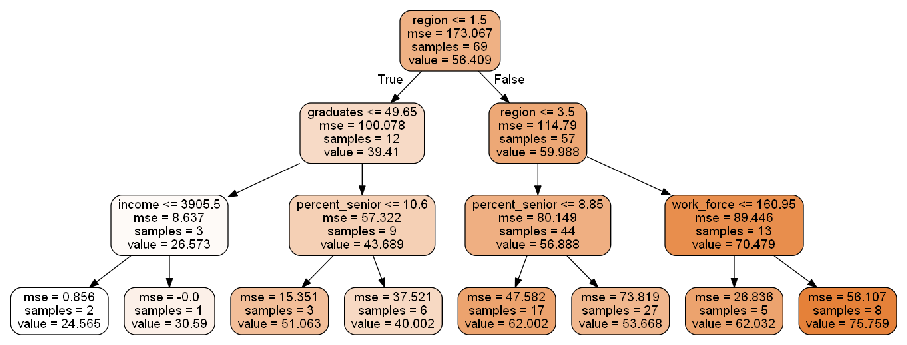

In [41]:
import pydotplus
import matplotlib.image as mpimg # supports basic image loading, rescaling and display operations.
import io                        # to deal with various types of I/O (input/output)

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(crime_rate_model_2, out_file=dot_data, rounded=True, 
                feature_names=X_test.columns, class_names=['No', 'Yes'],
                filled=True)

filename = "crime_rate_model_2.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(16,16))
plt.axes(frameon=False)     # hide axes lines
plt.xticks([])              # hide axis labels
plt.yticks([])              # hide axis labels
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

AS we can see from the figure above, now we obtained a much more interpretable and easy to understand model.

### Model 3: one-hot encoding, max_depth=3
* modified dataset by the use of one-hot encoder for the feature `region`
* max_depth = 3 (same as Model 2)

The idea here is to compare if the model is improved when using one-hot encoder to separate the feature `region` in three new variables.

In [42]:
# build the decision tree using default settings
from sklearn.tree import DecisionTreeRegressor

crime_rate_model_3 = DecisionTreeRegressor(max_depth=4)
crime_rate_model_3.fit(X_train_dummy, y_train_dummy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Model evaluation

In [43]:
# predicting crime rate for some individual datapoints
print('*'*20,'MODEL 3','*'*20)
print('Predicting the crime rate for the following 5 data points:\n')
print(X_test_dummy.head(5))
print('\nThe predicted crime rates are:')
print(crime_rate_model_3.predict(X_test_dummy.head(5)))

******************** MODEL 3 ********************
Predicting the crime rate for the following 5 data points:

    land_area  percent_city  percent_senior  physicians  hospital_beds  \
2        3553          37.4            10.7        9724          33731   
49       1165          14.5             8.6         746           4277   
81       2710          63.7             6.2         357           1277   
31       3491          48.5             9.7        1496           5620   
37        938          48.1             7.4         614           3016   

    graduates  work_force  income  region_1  region_2  region_3  region_4  
2        50.6      2066.3   33216         1         0         0         0  
49       54.4       237.1    3724         0         0         1         0  
81       72.8       110.9    1639         0         0         0         1  
31       59.6       362.3    4798         0         0         1         0  
37       50.0       280.9    4177         0         1         0  

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = crime_rate_model_3.predict(X_test_dummy)
y_pred_sel = crime_rate_model_3.predict(X_test_dummy.iloc[[21]])
y_test_sel = y_test_dummy.iloc[[21]]
print('*'*20,'MODEL 3','*'*20)
print("MSE for DTReg (All features): " , np.round(mean_squared_error(y_test_dummy, y_pred), 2))
print("MSE for DTReg (Features Selected): " , np.round(mean_squared_error(y_test_sel, y_pred_sel), 2))
print("MAE for DTReg (All features): " , np.round(mean_absolute_error(y_test_dummy, y_pred), 2))
print("MAE for DTReg (Features Selected): " , np.round(mean_absolute_error(y_test_sel, y_pred_sel), 2))
print("RSquared for DTReg (All features): " , np.round(r2_score(y_test_dummy, y_pred), 2))
#print("RSquared for DTReg (Features Selected): " , np.round(r2_score(y_test_sel, y_pred_sel), 2))

******************** MODEL 3 ********************
MSE for DTReg (All features):  233.4
MSE for DTReg (Features Selected):  445.63
MAE for DTReg (All features):  12.27
MAE for DTReg (Features Selected):  21.11
RSquared for DTReg (All features):  -0.23


#### Analysing decision trees

In [45]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(crime_rate_model_3, out_file='crime_rate_model_3.dot', 
                          feature_names=X_test_dummy.columns,  
#                          feature_names=metrop_areas_dummy.feature_names,  
#                          class_names=metrop_areas_dummy.target,  
                          class_names=['Low', 'High'],
                          filled=True, rounded=True,  
                          special_characters=True) 

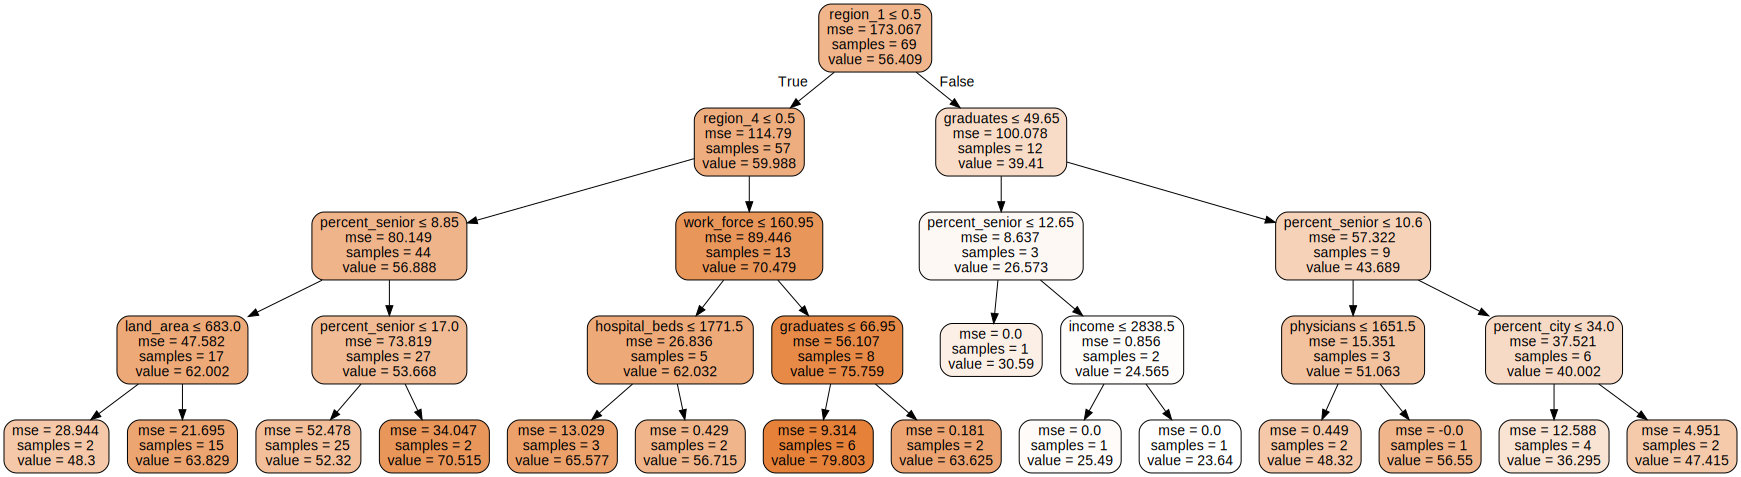

In [46]:
# visualize the graph for the tree
with open("crime_rate_model_3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

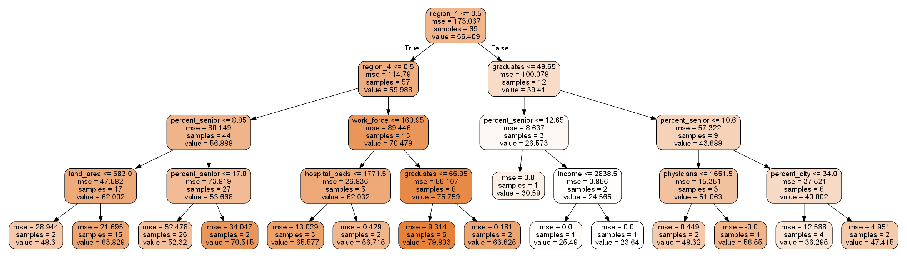

In [47]:
import pydotplus
import matplotlib.image as mpimg # supports basic image loading, rescaling and display operations.
import io                        # to deal with various types of I/O (input/output)

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(crime_rate_model_3, out_file=dot_data, rounded=True, 
                feature_names=X_test_dummy.columns, class_names=['No', 'Yes'],
                filled=True)

filename = "crime_rate_model_3.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(16,16))
plt.axes(frameon=False)     # hide axes lines
plt.xticks([])              # hide axis labels
plt.yticks([])              # hide axis labels
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

### Model 4: one-hot encoding, removed features, max_depth=3
* remove `work_force`, `income` and `hospital bed` from the modified dataset
* max_depth = 3 (same as Model 2)

From the heatmap plot, we can see that the features `work_force`(0.12), `income`(0.13), and `hospital bed`(0.012) present a low correlation to the `crime_rate`. What if we remove these features to see what happens to the model?

#### Removing features

We'll create a new dataset removing the features `work_force`, `income`, and `hospital bed`.

In [48]:
# create a new dataset by removing features
metrop_areas_dummy_drop = metrop_areas_dummy.drop(columns=['work_force', 'income', 'hospital_beds'])

In [49]:
# show thre first 3 lines of the new dataset
metrop_areas_dummy_drop.head(3)

,land_area,percent_city,percent_senior,physicians,graduates,crime_rate,region_1,region_2,region_3,region_4
0,1384,78.1,12.3,25627,50.1,75.55,1,0,0,0
1,3719,43.9,9.4,13326,53.9,56.03,0,1,0,0
2,3553,37.4,10.7,9724,50.6,41.32,1,0,0,0


#### Separating features from the target variable: X and y

In [50]:
# separe features(X) from target variable(y)
X_dummy_drop = metrop_areas_dummy_drop.drop('crime_rate', axis=1)  # attibutes to X all the variables except crime_rate
y_dummy_drop = metrop_areas_dummy_drop['crime_rate']

In [51]:
X_dummy_drop.head(3)

,land_area,percent_city,percent_senior,physicians,graduates,region_1,region_2,region_3,region_4
0,1384,78.1,12.3,25627,50.1,1,0,0,0
1,3719,43.9,9.4,13326,53.9,0,1,0,0
2,3553,37.4,10.7,9724,50.6,1,0,0,0


In [52]:
y_dummy_drop.head(3)

0    75.55
1    56.03
2    41.32
Name: crime_rate, dtype: float64

#### Splitting the new modified dataset into training and test sets

In [53]:
# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train_dummy_drop, X_test_dummy_drop, y_train_dummy_drop, y_test_dummy_drop = train_test_split(X_dummy_drop, y_dummy_drop, test_size = 0.30, random_state = 22)

#### Building the model

In [54]:
# build the decision tree using default settings
from sklearn.tree import DecisionTreeRegressor

crime_rate_model_4 = DecisionTreeRegressor(max_depth=3)
crime_rate_model_4.fit(X_train_dummy_drop, y_train_dummy_drop)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Model evaluation

In [55]:
# predicting crime rate for some individual datapoints
print('*'*20,'MODEL 4','*'*20)
print('Predicting the crime rate for the following 5 data points:\n')
print(X_test_dummy_drop.head(5))
print('\nThe predicted crime rates are:')
print(crime_rate_model_4.predict(X_test_dummy_drop.head(5)))

******************** MODEL 4 ********************
Predicting the crime rate for the following 5 data points:

    land_area  percent_city  percent_senior  physicians  graduates  region_1  \
2        3553          37.4            10.7        9724       50.6         1   
49       1165          14.5             8.6         746       54.4         0   
81       2710          63.7             6.2         357       72.8         0   
31       3491          48.5             9.7        1496       59.6         0   
37        938          48.1             7.4         614       50.0         0   

    region_2  region_3  region_4  
2          0         0         0  
49         0         1         0  
81         0         0         1  
31         0         1         0  
37         1         0         0  

The predicted crime rates are:
[40.00166667 62.00235294 66.17111111 53.66814815 62.00235294]


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = crime_rate_model_4.predict(X_test_dummy_drop)
y_pred_sel = crime_rate_model_4.predict(X_test_dummy_drop.iloc[[21]])
y_test_sel = y_test_dummy_drop.iloc[[21]]
print('*'*20,'MODEL 4','*'*20)
print("MSE for DTReg (All features): " , np.round(mean_squared_error(y_test_dummy_drop, y_pred), 2))
print("MSE for DTReg (Features Selected): " , np.round(mean_squared_error(y_test_sel, y_pred_sel), 2))
print("MAE for DTReg (All features): " , np.round(mean_absolute_error(y_test_dummy_drop, y_pred), 2))
print("MAE for DTReg (Features Selected): " , np.round(mean_absolute_error(y_test_sel, y_pred_sel), 2))
print("RSquared for DTReg (All features): " , np.round(r2_score(y_test_dummy_drop, y_pred), 2))
#print("RSquared for DTReg (Features Selected): " , np.round(r2_score(y_test_sel, y_pred_sel), 2))

******************** MODEL 4 ********************
MSE for DTReg (All features):  203.47
MSE for DTReg (Features Selected):  736.31
MAE for DTReg (All features):  10.51
MAE for DTReg (Features Selected):  27.14
RSquared for DTReg (All features):  -0.07


#### Analysing decision trees

In [57]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(crime_rate_model_4, out_file='crime_rate_model_4.dot', 
                          feature_names=X_test_dummy_drop.columns,  
#                          feature_names=metrop_areas_dummy.feature_names,  
#                          class_names=metrop_areas_dummy.target,  
                          class_names=['Low', 'High'],
                          filled=True, rounded=True,  
                          special_characters=True) 

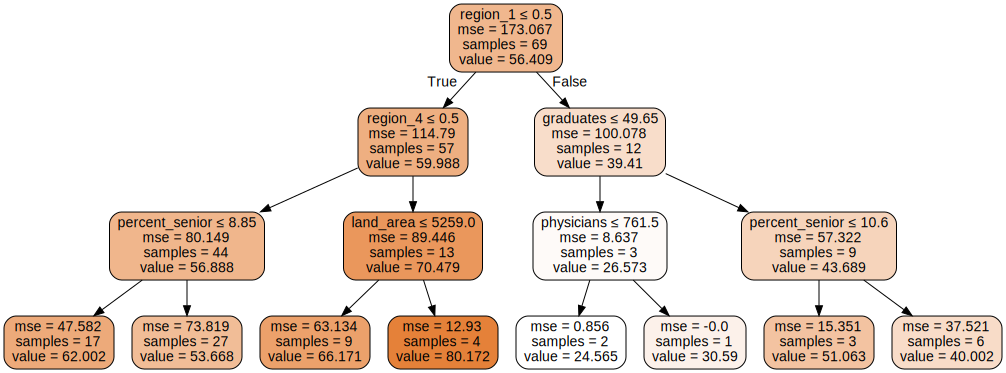

In [58]:
# visualize the graph for the tree
with open("crime_rate_model_4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

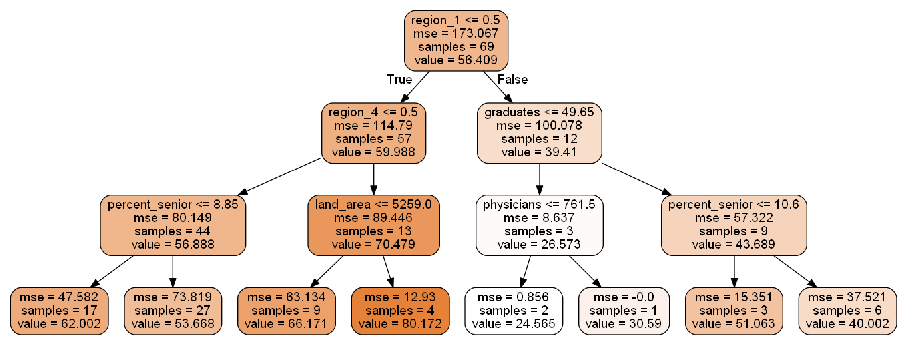

In [59]:
import pydotplus
import matplotlib.image as mpimg # supports basic image loading, rescaling and display operations.
import io                        # to deal with various types of I/O (input/output)

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(crime_rate_model_4, out_file=dot_data, rounded=True, 
                feature_names=X_test_dummy_drop.columns, class_names=['Low', 'High'],
                filled=True)

filename = "crime_rate_model_4.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(16,16))
plt.axes(frameon=False)     # hide axes lines
plt.xticks([])              # hide axis labels
plt.yticks([])              # hide axis labels
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

So far we have seen that reducing the number of leaves through the parameter `max_depth` in the `DecisionTreeRegressor` made the model easier to interpret.

However, what would be the best value for `max_depth`? Which features are most important in building the model?

## Feature importance in trees

After playing with some models, now we can dig a little deep trying to understand the importance of each feature calculating
**feature importance** (a number between 0 and 1), which rates how important each feature is for the decision a tree makes. The 0 means “not used at all” and 1 means “perfectly predicts the target.” 

If a feature has low importance, it doesn’t mean that it is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

In [60]:
print('MODEL 4')
print("Feature importances:\n{}".format(crime_rate_model_4.feature_importances_))

MODEL 4
Feature importances:
[0.0658286  0.         0.11753666 0.00293451 0.0799241  0.50900509
 0.         0.         0.22477104]


For the sake of clarity, we can also plot a graph to investigate the feature importance. Let's do it for all the models, but first, let's write a function `plot_feature_importances_crime()` to facilitate this job.

In [61]:
def plot_feature_importances_crime(model, dataset, title,plt):
    """
    This function calculates the feature importance and plot a horizontal bar chart.
    
    ...
    
    Attributes
    ----------
    model : sklearn.tree._classes.DecisionTreeRegressor
         the regression decision tree model
    dataset : pandas.core.frame.DataFrame
         the training dataset
    title: str
         the title for the plot
    """
    n_features = dataset.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(title)

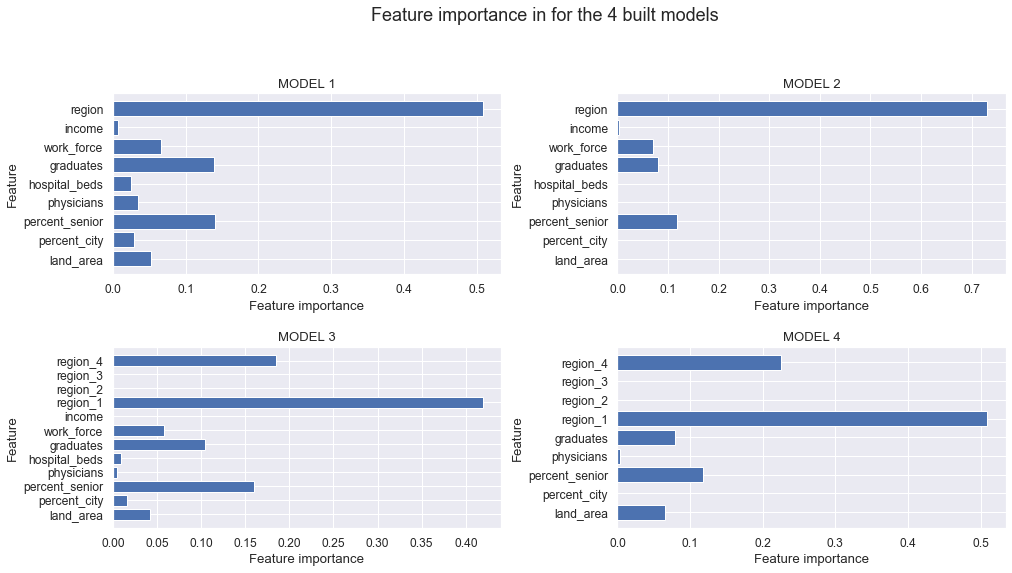

In [62]:
# plot feature importance for the 4 models
fig, ax = plt.subplots(2,2, figsize=(16,8))

plt.subplot(2,2,1)
plot_feature_importances_crime(crime_rate_model_1, X_train, 'MODEL 1',plt)

plt.subplot(2,2,2)
plot_feature_importances_crime(crime_rate_model_2, X_train, 'MODEL 2',plt)

plt.subplot(2,2,3)
plot_feature_importances_crime(crime_rate_model_3, X_train_dummy, 'MODEL 3',plt)

plt.subplot(2,2,4)
plot_feature_importances_crime(crime_rate_model_4, X_train_dummy_drop, 'MODEL 4',plt)

fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Feature importance in for the 4 built models', fontsize=18, y=1.03)
plt.show()

* We can see that `region` is the most important feature for models 1 and 2. 
* When we separate `region` using one-hot encoding we can see that regions 1 and 4 are the most importan features for models 2 and 3.

### Summary
The following table summarizes the observations made for the four built models, including feature importance and some metrics:

    
| MODEL   |DESCRIPTION |SUMMARY |MSE |MAE| ${r^2}$|
|:------|:-------|:-------|----|---|----|
| 1 <br/>|original dataset <br/><br/>`DecisionTreeRegressor()`, default settings      |the most important feature is `region`<br/><br/> followed by 'percent_senior', 'percent_senior', and other features <br/><br/> complex model with too many leaves| 312.5 |13.86| -0.64
| 2 <br/> | original dataset <br/><br/> `DecisionTreeRegressor(max_depth=3)` |the most important feature is also `region` <br/><br/> followed only by `percent_senior`, `graduates`, `work_force`<br/><br/> easier to understand model| 213.46| 11.02 | -0.12
| 3  <br/><br/> | modified dataset: `region` was splitted using one-hot encoding into 4 columns (`region_1`, `regions2`, `region_3` and `region_4`) <br/><br/> `DecisionTreeRegressor(max_depth=3)` |the most important feature is `region_1` <br/><br/> followed by `region_4`, `percent_senior`, and other features <br/><br/> easier to understand model |233.4 | 12.27 | -0.23
| 4 <br/> | modified dataset: sames as in MODEL 3 but the features `work_force`, `income` and `hospital bed` were removed here<br/><br/> `DecisionTreeRegressor(max_depth=3)` |the most important feature is `region_1` <br/><br/> followed by `region_4`, `percent_senior`, `graduates` and `land_area` <br/><br/> easier to understand model | 203.47 | 10.51 | -0.07

We can further explore the trends between `crime_rate` and `region` using `groupby()` when plotting a bar chart.

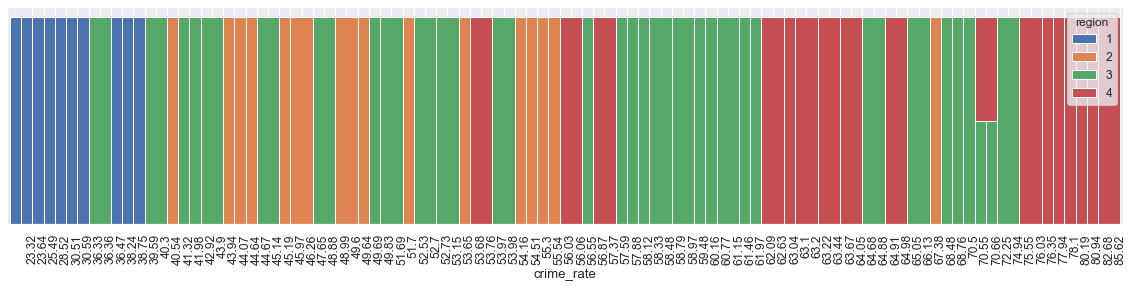

In [63]:
metrop_areas.groupby(['crime_rate', 'region']).size().groupby(level=0).apply(lambda x: 100*x / x.sum()).unstack().plot(kind='bar', stacked=True, width=2,figsize=(20,4),position=1)
plt.yticks([])
plt.show()

In the precious plot, we can see that, in general:
* region 1 has the smaller(only) crime rates;
* region 2 has intermdiate crime rates;
* region 3 is distributued over almost all crime rates;
* region 4 has the greatest ones.

Now we can understand why algorithm is given more importance to regions 1 and 4.

## Building the learning curves

We can plot **learning curves** to compare the model performance on training and test set. They show us how the error changes as the size of the training set increases. This can give us an idea of how well the model can generalize to new data.

Let's create the function `plot_learning_curve` to facilitate our job. Here we'll use `learning_curve` from `sklearn`.

In [64]:
def plot_learning_curve(X, y, maxdepth, plt):
    """
    This function plot the learning curve for a model.
    
    ...
    
    Attributes
    ----------
    X : 
         feature matrix
    y : 
         target variable vector
    maxdepth: int
         max_depth parameter for classifier
    """
    # create cv training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(DecisionTreeRegressor(max_depth=maxdepth),
                                                            X,                                     # feature matrix
                                                            y,                                     # target vector
                                                            cv=10,                                 # number of folds in cross-validation
                                                            scoring='neg_mean_squared_error',      # metric
                                                            n_jobs=-1,                             # use all computer cores,
                                                            train_sizes=np.linspace(0.01, 1.0, 30) # 30 different sizes of the training set
                                                            )
    # create means and standart deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # create means and standart deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # draw lines
    plt.plot(train_sizes, train_mean, '--', color='#111111', label="Training score")
    plt.plot(train_sizes, test_mean, color='#111111', label="Cross-validation score")

    # draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#f4d0d7")
       
    # create plot    
    plt.title("Learning curve")
    plt.xlabel("Training set size", fontsize=18)
    plt.ylabel("mse", fontsize=18)
    plt.legend(loc="best")
    plt.tight_layout()

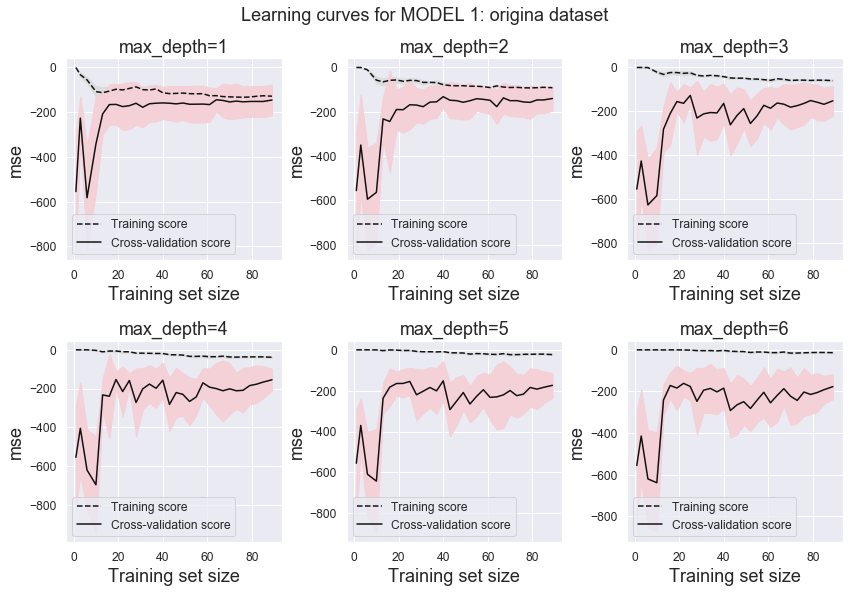

In [65]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(2,3, figsize=(12,8))

for i in range(0,6):
    plt.subplot(2,3,i+1)
    plot_learning_curve(X, y, i+1, plt)
    plt.title(f'max_depth={i+1}', size=18)

fig.suptitle('Learning curves for MODEL 1: origina dataset', fontsize=18, y=1.03)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

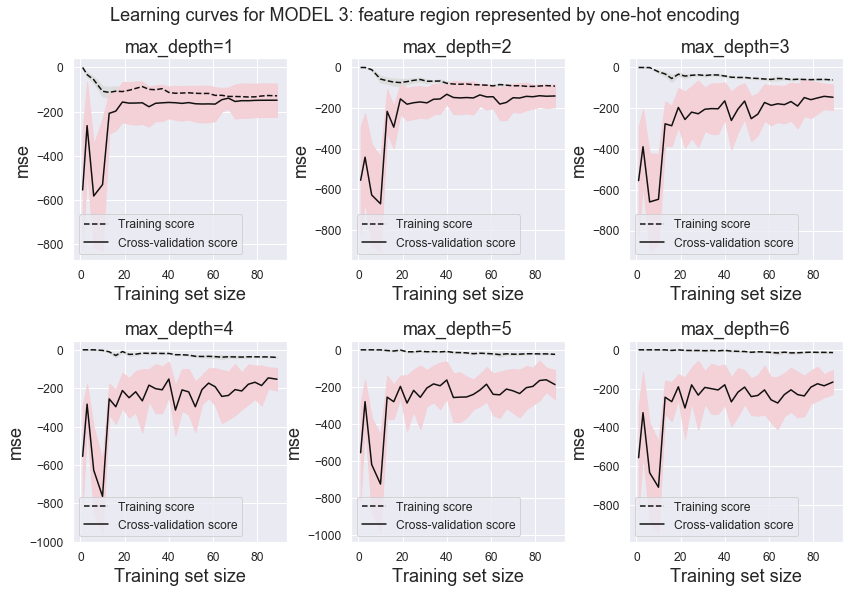

In [66]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(2,3, figsize=(12,8))

for i in range(0,6):
    plt.subplot(2,3,i+1)
    plot_learning_curve(X_dummy, y_dummy, i+1, plt)
    plt.title(f'max_depth={i+1}', size=18)

fig.suptitle('Learning curves for MODEL 3: feature region represented by one-hot encoding', fontsize=18, y=1.03)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

Considering that it is desirable that both training and test learning curves reach a plateau, and that the gap between then is consistent, 
it seems that the better choice for the parameter `max_depth` would be `1` or `2` as shown by the previous plots.

Let's built the last model using this knowledge and setting `max_depth = 2` to see what we'll get.

### Model 5: original dataset, max_depth=2
* original dataset
* `max_depth = 2` 

In [67]:
# build the decision tree using default settings
from sklearn.tree import DecisionTreeRegressor

crime_rate_model_5 = DecisionTreeRegressor(max_depth=2)
crime_rate_model_5.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Analysing decision trees

In [68]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(crime_rate_model_5, out_file='crime_rate_model_5.dot', 
                          feature_names=X_test.columns,  
#                          class_names=['0', '1'],  
                          class_names=['No', 'Yes'],
                          filled=True, rounded=True,  
                          special_characters=True) 

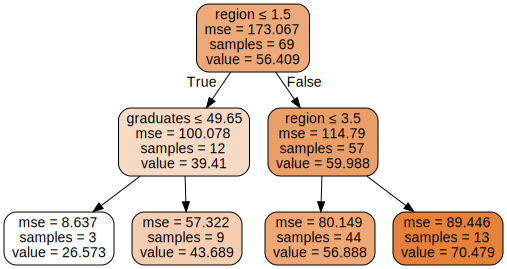

In [69]:
# visualize the graph for the tree
with open("crime_rate_model_5.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Conclusions

* The main task (to build a simple regression decision trees model to predict the crime rate) was accomplished.

* Four regression decision tree models were built using the original and modified dataset and their resulted trees were observed. The complexity of the model was then reduced by varying the parameter max_depth of the regressor.

* The importance of specific features was also analyzed and an interesting pattern was observed when separating the feature regions in four news features, one for each specific region. It made clearer the choice of the algorithm for regions 1 and 4 when making a prediction. The results could be improved with a larger dataset.

* Finally, the performance of the models was measured by generating and analyzing the learning curves.

* All that said, for being my first machine learning model I think it was a very positive and exciting experience.